<a href="https://colab.research.google.com/github/vidjaydas/Data_Science_Python/blob/main/Regression_Waist_AT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We are goint to built a model to check weather "Waist" circumference is corelated to AT (Adipose Tissue)

In [4]:
import pandas as pd
data = pd.read_csv('/content/WC_AT.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


#Correlation

In [6]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [7]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


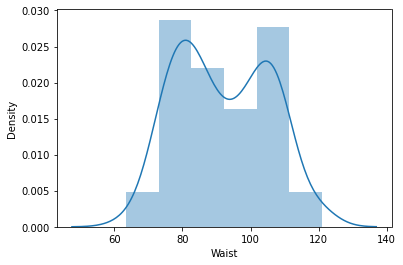

In [8]:
sns.distplot(data['Waist'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


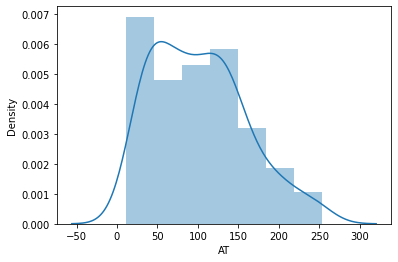

In [9]:
sns.distplot(data['AT'])

#Fitting a Linear Regression Model

In [11]:
import statsmodels.formula.api as smf
model = smf.ols('AT~Waist', data=data).fit()    # Y variable ~ X Variable

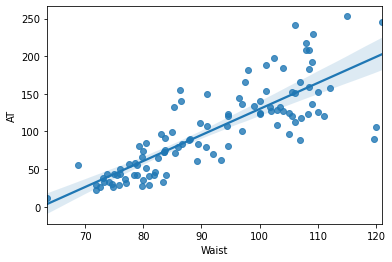

In [12]:
sns.regplot(x='Waist', y='AT', data = data)   # Best fit line

In [13]:
# Coefficients
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [22]:
-215.981+3.458*80

60.65899999999999

In [14]:
# t and p-Values
print(model.tvalues, '\n' , model.pvalues)
#pValue is less than alpha (0.05) it means there is a significant relation between Waist and AT

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [15]:
# R Square Values
(model.rsquared, model.rsquared_adj)

(0.670036893052843, 0.6669531256981966)

# Result: the confidence interval is 67%, which is moderate/poor equation

#Predict for new data point

In [23]:
# predict for Waist Circumference
newdata = pd.Series([80])

In [24]:
newdata

0    80
dtype: int64

In [25]:
data_pred = pd.DataFrame(newdata, columns=['Waist'])

In [26]:
data_pred

,Waist
0,80


In [27]:
model.predict(data_pred)

0    60.727263
dtype: float64